In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('US_daily.csv')
print(df.columns.tolist())

['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Company', 'mv100', 'mv50', 'mv9', 'bb_bbm', 'bb_bbh', 'bb_bbl', 'rsi14', 'rsimv9', 'rsi50', 'wd', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11', 'f12', 'f13', 'f14', 'f15', 'f16', 'f17', 'f18', 'f19', 'f20', 'f21', 'f22', 'f23', 'f24', 'f25', 'f26', 'f27', 'f28', 'f29', 'f30', 'f31', 'f32', 'f33', 'MF Multiplier', 'MF Volume', 'f34', 'f35', 'feature_0', 'feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5', 'feature_6', 'feature_7', 'feature_8', 'feature_9', 'feature_10', 'feature_11', 'feature_12', 'feature_13', 'feature_14', 'feature_15', 'feature_16', 'feature_17', 'feature_18', 'feature_19', 'feature_20', 'feature_21', 'feature_22', 'feature_23', 'feature_24', 'feature_25', 'feature_26', 'feature_27', 'feature_28', 'feature_29', 'feature_30', 'feature_31', 'feature_32', 'feature_33', 'feature_34', 'feature_35', 'feature_36', 'feature_37', 'feature_38', 'feature_39', 'feature_40', 'feature_41', 'featu

In [3]:
df

,Date,Open,High,Low,Close,Volume,Company,mv100,mv50,mv9,...,feature_91,feature_92,feature_93,feature_94,feature_95,feature_96,feature_97,feature_98,feature_99,Next_Day_Close
0,2020-05-26,82.248296,86.330164,82.000375,84.842628,41233900,JPM,96.673945,80.039495,79.036118,...,0.000015,0.000022,0.000018,0.000012,0.000008,0.000018,0.000021,0.000010,0.000012,89.756813
1,2020-05-26,102.962943,104.563268,102.696227,102.891823,4822000,TXN,102.827698,96.067687,100.253275,...,0.000024,0.000035,0.000028,0.000019,0.000013,0.000027,0.000034,0.000016,0.000019,104.749977
2,2020-05-26,278.731152,279.229389,274.970867,277.217651,4567800,UNH,259.624948,251.507018,271.754730,...,0.000007,0.000010,0.000008,0.000005,0.000003,0.000008,0.000010,0.000004,0.000005,285.565430
3,2020-05-26,43.217167,43.492685,42.650383,42.744846,20830500,VZ,44.422925,43.453458,42.963517,...,0.000027,0.000040,0.000032,0.000022,0.000015,0.000031,0.000039,0.000018,0.000021,43.406097
4,2020-05-26,56.814993,57.529449,56.775299,57.259541,5627800,PM,61.842569,56.759710,55.113540,...,0.000035,0.000051,0.000041,0.000027,0.000019,0.000039,0.000050,0.000023,0.000028,58.672588
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34423,2023-12-28,104.964769,105.558851,104.539008,105.202400,5689100,ORCL,110.172590,108.298763,104.422386,...,0.000008,0.000012,0.000009,0.000006,0.000004,0.000009,0.000011,0.000005,0.000006,104.390480
34424,2023-12-28,106.412482,108.586193,106.015456,108.010506,9352900,NKE,103.250478,108.674890,114.839322,...,0.000033,0.000048,0.000039,0.000026,0.000018,0.000037,0.000047,0.000022,0.000027,107.762367
34425,2023-12-28,49.359866,49.408659,49.203722,49.262276,8549900,CSCO,51.231929,49.245492,48.910962,...,0.000015,0.000022,0.000018,0.000012,0.000008,0.000017,0.000021,0.000010,0.000011,49.301311
34426,2023-12-28,662.863459,663.868939,658.622617,660.125793,1496900,COST,561.175412,582.071428,654.362352,...,0.000033,0.000047,0.000039,0.000026,0.000018,0.000038,0.000047,0.000022,0.000026,657.119385


In [4]:
TIME_STEPS = 30

def prepare_data(df, sequence_length=TIME_STEPS):
    data_sequences = []
    vector_sequences = []
    labels = []
    companies = []
    dates = []

    unique_companies = df['Company'].unique()
    for company in unique_companies:
        company_df = df[df['Company'] == company]
        company_df_reduced = company_df.drop(columns=columns_to_drop)
        company_data = company_df_reduced.iloc[:, :52].to_numpy()
        company_vector = company_df_reduced.iloc[:, 52:].to_numpy()
        company_label = company_df['Next_Day_Close'].to_numpy()
        company_dates = company_df['Date'].to_numpy()

        if len(company_data) >= sequence_length:
            data_sequences.extend(create_sequences(company_data, sequence_length))
            vector_sequences.extend(company_vector[sequence_length - 1:])
            labels.extend(company_label[sequence_length - 1:])
            companies.extend([company] * (len(company_data) - sequence_length + 1))
            dates.extend(company_dates[sequence_length - 1:])

    return (np.array(data_sequences), 
            np.array(vector_sequences), 
            np.array(labels), 
            np.array(companies), 
            np.array(dates))

def create_sequences(data, sequence_length=TIME_STEPS):
    sequences = []
    for i in range(len(data) - sequence_length + 1):
        sequences.append(data[i:i + sequence_length])
    return np.array(sequences)

In [5]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

df = df.sort_values(by=['Company', 'Date'])

columns_to_drop = ['Date', 'Company', 'Next_Day_Close']

train_df = df[df['Date'] < '2023-04-01']
validation_df = df[(df['Date'] >= '2023-04-01') & (df['Date'] < '2023-08-01')]
test_df = df[df['Date'] >= '2023-08-01']

train_data, train_vector, train_label, train_companies, train_dates = prepare_data(train_df)
val_data, val_vector, val_label, val_companies, val_dates = prepare_data(validation_df)
test_data, test_vector, test_label, test_companies, test_dates = prepare_data(test_df)

scaler = StandardScaler()
train_data_shape = train_data.shape
val_data_shape = val_data.shape
test_data_shape = test_data.shape

train_data = scaler.fit_transform(train_data.reshape(-1, train_data.shape[-1])).reshape(train_data_shape)
val_data = scaler.transform(val_data.reshape(-1, val_data.shape[-1])).reshape(val_data_shape)
test_data = scaler.transform(test_data.reshape(-1, test_data.shape[-1])).reshape(test_data_shape)

scaler = StandardScaler()

train_label = scaler.fit_transform(train_label.reshape(-1, 1)).flatten()
val_label = scaler.transform(val_label.reshape(-1, 1)).flatten()
test_label = scaler.transform(test_label.reshape(-1, 1)).flatten()

print("Train data shape:", train_data.shape)
print("Train vector shape:", train_vector.shape)
print("Train label shape:", train_label.shape)
print("Train companies shape:", train_companies.shape)
print("Train dates shape:", train_dates.shape)

print("Val data shape:", val_data.shape)
print("Val vector shape:", val_vector.shape)
print("Val label shape:", val_label.shape)
print("Val companies shape:", val_companies.shape)
print("Val dates shape:", val_dates.shape)

print("Test data shape:", test_data.shape)
print("Test vector shape:", test_vector.shape)
print("Test label shape:", test_label.shape)
print("Test companies shape:", test_companies.shape)
print("Test dates shape:", test_dates.shape)

Train data shape: (26220, 30, 52)
Train vector shape: (26220, 100)
Train label shape: (26220,)
Train companies shape: (26220,)
Train dates shape: (26220,)
Val data shape: (2014, 30, 52)
Val vector shape: (2014, 100)
Val label shape: (2014,)
Val companies shape: (2014,)
Val dates shape: (2014,)
Test data shape: (2888, 30, 52)
Test vector shape: (2888, 100)
Test label shape: (2888,)
Test companies shape: (2888,)
Test dates shape: (2888,)


## Model_4 OHLC+Indicators+Descriptions+Transformer+Previous data

In [6]:
import tensorflow as tf
from tensorflow.keras.layers import Flatten, LSTM, Bidirectional, Input, Dense, Dropout, LayerNormalization, MultiHeadAttention, Add, Concatenate, BatchNormalization, Reshape
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping

INPUT_DIMS = 52
d_model = 256
num_heads = 8
ff_dim = 256

def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout=0):
    # Normalization and Attention
    x = LayerNormalization(epsilon=1e-6)(inputs)
    x = MultiHeadAttention(key_dim=head_size, num_heads=num_heads, dropout=dropout)(x, x)
    x = Dropout(dropout)(x)
    res = Add()([x, inputs])

    # Feed Forward Part
    x = LayerNormalization(epsilon=1e-6)(res)
    x = Dense(ff_dim, activation="relu")(x)
    x = Dropout(dropout)(x)
    x = Dense(inputs.shape[-1])(x)
    return Add()([x, res])

def AdvancedModel():
    data_input = Input(shape=(TIME_STEPS, INPUT_DIMS))
    x1 = Bidirectional(LSTM(d_model // 2, return_sequences=False))(data_input)
    x1 = Dense(100, activation='relu')(x1) 

    vector_input = Input(shape=(100,))

    combined = Concatenate(axis=1)([x1, vector_input])
    combined = Reshape((2, 100))(combined)  

    transformer_output = transformer_encoder(combined, head_size=100, num_heads=num_heads, ff_dim=ff_dim)

    flattened = Flatten()(transformer_output)
    x = Dense(256, activation='relu')(flattened)
    x = Dense(128, activation='relu')(x)
    x = Dense(20, activation='relu')(x)
    outputs = Dense(1)(x)

    model = Model(inputs=[data_input, vector_input], outputs=outputs)
    return model

In [7]:
import keras.backend as K
def mean_absolute_percentage_error_loss(y_true, y_pred):
    return K.mean(K.abs((y_true - y_pred) / K.clip(K.abs(y_true), K.epsilon(), None))) * 100

model = AdvancedModel()

adam_optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=0.0001)
model.compile(optimizer=adam_optimizer, loss=mean_absolute_percentage_error_loss, metrics=['mean_absolute_error'])

# model.summary()

In [8]:
early_stopping = EarlyStopping(
    monitor='val_loss',  # Metric to monitor, e.g., validation loss
    patience=2,  # Number of epochs with no improvement after which training will be stopped
    verbose=0,  # Verbosity mode
    restore_best_weights=True  # Restore model weights from the epoch with the best value of the monitored quantity
)

# Train the model
history = model.fit(
    [train_data, train_vector], train_label,
    validation_data=([val_data, val_vector], val_label),
    epochs=50,  # Adjust the number of epochs as needed
    batch_size=32, 
    callbacks=[early_stopping]# Adjust the batch size as needed
)

Epoch 1/50
820/820 [==============================] - 19s 22ms/step - loss: 55.9782 - mean_absolute_error: 0.2176 - val_loss: 30.2936 - val_mean_absolute_error: 0.1556
Epoch 2/50
820/820 [==============================] - 20s 24ms/step - loss: 40.8861 - mean_absolute_error: 0.1121 - val_loss: 30.4061 - val_mean_absolute_error: 0.1665
Epoch 3/50
820/820 [==============================] - 21s 25ms/step - loss: 26.9125 - mean_absolute_error: 0.0794 - val_loss: 14.5896 - val_mean_absolute_error: 0.0724
Epoch 4/50
820/820 [==============================] - 21s 26ms/step - loss: 20.2320 - mean_absolute_error: 0.0628 - val_loss: 15.9302 - val_mean_absolute_error: 0.0744
Epoch 5/50
820/820 [==============================] - 22s 27ms/step - loss: 17.1055 - mean_absolute_error: 0.0527 - val_loss: 18.8326 - val_mean_absolute_error: 0.0549


In [9]:
'''
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1) 
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2) 
plt.plot(history.history['mean_absolute_error'], label='Train MAE')
plt.plot(history.history['val_mean_absolute_error'], label='Validation MAE')
plt.title('Model MAE')
plt.ylabel('Mean Absolute Error')
plt.xlabel('Epoch')
plt.legend(loc='upper right')

plt.show()
'''

"\nimport matplotlib.pyplot as plt\n\nplt.figure(figsize=(16, 6))\n\nplt.subplot(1, 2, 1) \nplt.plot(history.history['loss'], label='Train Loss')\nplt.plot(history.history['val_loss'], label='Validation Loss')\nplt.title('Model Loss')\nplt.ylabel('Loss')\nplt.xlabel('Epoch')\nplt.legend(loc='upper right')\n\nplt.subplot(1, 2, 2) \nplt.plot(history.history['mean_absolute_error'], label='Train MAE')\nplt.plot(history.history['val_mean_absolute_error'], label='Validation MAE')\nplt.title('Model MAE')\nplt.ylabel('Mean Absolute Error')\nplt.xlabel('Epoch')\nplt.legend(loc='upper right')\n\nplt.show()\n"

In [10]:
# Evaluate the model on the test set
test_loss, test_mae = model.evaluate([test_data, test_vector], test_label)

91/91 [==============================] - 1s 9ms/step - loss: 9.8514 - mean_absolute_error: 0.0722


In [11]:
predictions = model.predict([test_data, test_vector])
predictions = predictions.reshape(-1)

91/91 [==============================] - 1s 11ms/step


In [12]:
test_results_df = pd.DataFrame({
    'Test Label': test_label,
    'Company': test_companies,
    'Date': test_dates,
    'Predictions': predictions
})

test_results_df = test_results_df.sort_values(by=['Date', 'Company'])

test_results_df

,Test Label,Company,Date,Predictions
0,-0.277029,ABBV,2023-09-12,-0.220867
76,-0.598891,ABT,2023-09-12,-0.544361
152,0.893162,ACN,2023-09-12,0.885345
228,2.645340,ADBE,2023-09-12,2.471143
304,-0.719073,AVGO,2023-09-12,-0.747179
...,...,...,...,...
2583,0.538384,V,2023-12-28,0.577589
2659,-1.062303,VZ,2023-12-28,-1.037560
2735,-0.971336,WFC,2023-12-28,-0.991620
2811,-0.945598,WMT,2023-12-28,-0.884368


In [13]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Function to calculate RMSE
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# Group by company and calculate each metric
grouped = test_results_df.groupby('Company').apply(lambda x: pd.Series({
    'MAE': mean_absolute_error(x['Test Label'], x['Predictions']),
    'RMSE': rmse(x['Test Label'], x['Predictions']),
    'Count': len(x)
}))

ranked_by_mae = grouped.sort_values('MAE', ascending=True)

ranked_by_mae

,MAE,RMSE,Count
Company,,,
JPM,0.020920,0.028654,76.0
PG,0.021443,0.026500,76.0
WFC,0.022540,0.027264,76.0
V,0.026614,0.035186,76.0
WMT,0.027430,0.033104,76.0
TXN,0.028570,0.035303,76.0
CSCO,0.028913,0.035777,76.0
JNJ,0.031082,0.038440,76.0
SCHW,0.033502,0.040109,76.0


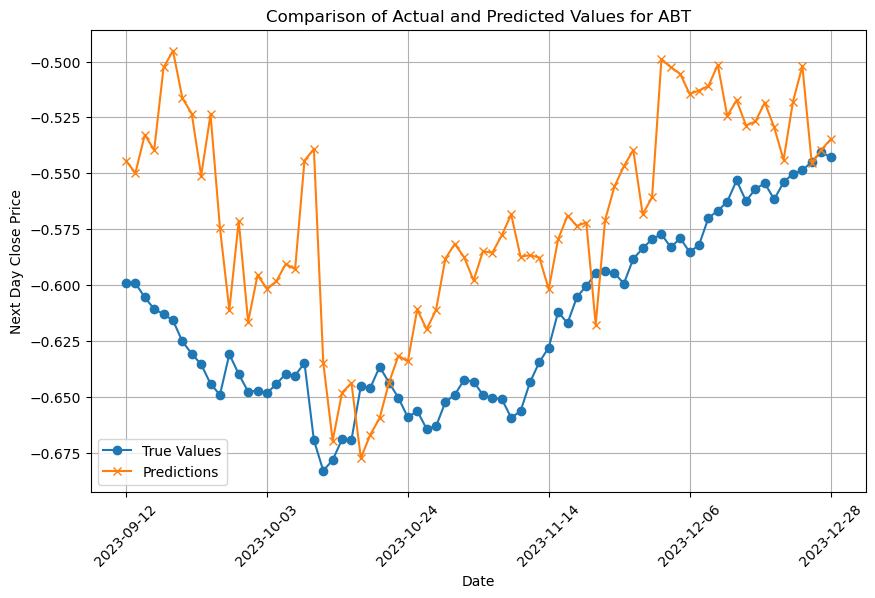

In [14]:
import matplotlib.pyplot as plt
plot_data = test_results_df[test_results_df['Company'] == 'ABT']

plt.figure(figsize=(10, 6))
plt.plot(plot_data['Date'], plot_data['Test Label'], label='True Values', marker='o')
plt.plot(plot_data['Date'], plot_data['Predictions'], label='Predictions', marker='x')
plt.title('Comparison of Actual and Predicted Values for ABT')
plt.xlabel('Date')
plt.ylabel('Next Day Close Price')
plt.legend()
plt.grid(True)

num_ticks = 5  
every_nth = max(1, len(plot_data['Date']) // num_ticks)
plt.gca().set_xticks(plot_data['Date'][::every_nth])
plt.xticks(rotation=45)  

plt.show()

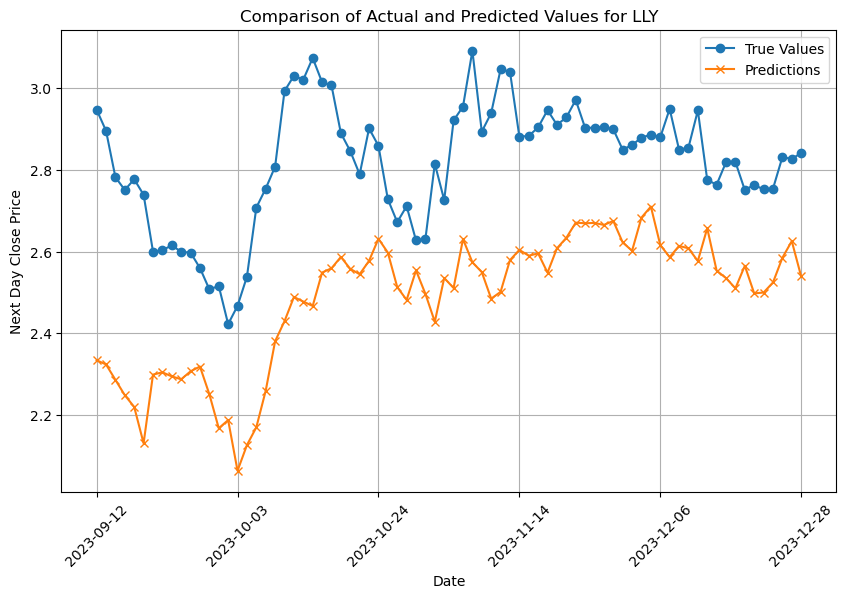

In [15]:
plot_data = test_results_df[test_results_df['Company'] == 'LLY']

plt.figure(figsize=(10, 6))
plt.plot(plot_data['Date'], plot_data['Test Label'], label='True Values', marker='o')
plt.plot(plot_data['Date'], plot_data['Predictions'], label='Predictions', marker='x')
plt.title('Comparison of Actual and Predicted Values for LLY')
plt.xlabel('Date')
plt.ylabel('Next Day Close Price')
plt.legend()
plt.grid(True)


num_ticks = 5  
every_nth = max(1, len(plot_data['Date']) // num_ticks)
plt.gca().set_xticks(plot_data['Date'][::every_nth])
plt.xticks(rotation=45)  

plt.show()

In [17]:
result_MAE = []
result_MSE = []
for i in range(20):
    model = AdvancedModel()
    adam_optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=0.0001)
    model.compile(optimizer=adam_optimizer, loss='mean_squared_error', metrics=['mean_absolute_error'])
    early_stopping = EarlyStopping(
        monitor='val_loss',  # Metric to monitor, e.g., validation loss
        patience=2,  # Number of epochs with no improvement after which training will be stopped
        verbose=0,  # Verbosity mode
        restore_best_weights=True  # Restore model weights from the epoch with the best value of the monitored quantity
        )
    model.fit(
        [train_data, train_vector], train_label,
        validation_data=([val_data, val_vector], val_label),
        epochs=50,  
        batch_size=32,  
        verbose=0,
        callbacks=[early_stopping]
    )
    test_loss, test_mae = model.evaluate([test_data, test_vector], test_label)
    result_MAE.append(test_mae)
    result_MSE.append(test_loss)
print('MAE : ',np.mean(result_MAE))
print('MSE : ',np.mean(result_MSE))

91/91 [==============================] - 1s 6ms/step - loss: 0.0027 - mean_absolute_error: 0.0366


KeyboardInterrupt: 